## Oceanbolt Python SDK Lesson 4: Terminal-level exports 

This is the fourth lesson in our learning series for the Oceanbolt Python SDK.

In this example, we show how to find terminal level exports via the SDK. Specifically, we will use the SDK to find Daily Iron Ore Exports from Vale's Terminal in Ilha Guaíba 

You can find an article with more context around the methodologies on our blog: https://www.oceanbolt.com/blog

In [1]:
# Import the relevant libraries
# In order to get a timeseries of weekly export volumes, we use the TradeFlowTimeseries client (https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.trade_flows import TradeFlowTimeseries
from datetime import date

In [2]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [3]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: TradeFlows
trade_flow_client = TradeFlowTimeseries(base_client)

In [4]:
# We apply filters to our query to get a timeseries of daily iron ore exports from Vale's Ilha Guaíba Terminal
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#arguments

df = trade_flow_client.get(
    frequency="daily",
    load_berth_id = [5923], #The Oceanbolt Berth ID as discovered by using https://app.oceanbolt.com/
    commodity_group=['iron ore'], 
    start_date=date(2021, 4, 1),
    end_date=date.today(),
    exclude_intra_country = True
)

#let us rename the column
df = df.rename(columns={'value': 'volume, mt'})

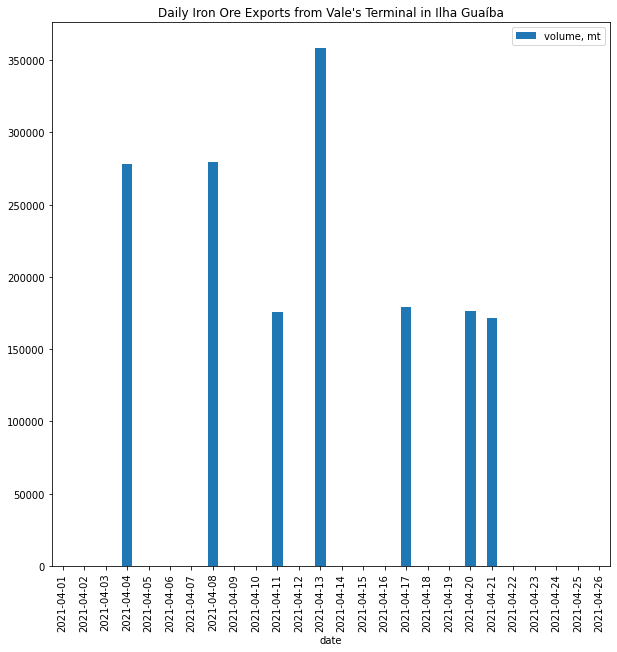

In [6]:
#Let's plot the timeseries
df.plot.bar(x='date',figsize=(10,10), title='Daily Iron Ore Exports from Vale\'s Terminal in Ilha Guaíba');

Vale stated in their press release that 60k metric tonnes of iron ore had been exported daily in 1Q21. Let us confirm our data. 

In [20]:
# Get the 1Q21 trade flows
df_1q = trade_flow_client.get(
    frequency="daily",
    load_berth_id = [5923], #The Oceanbolt Berth ID as discovered by using https://app.oceanbolt.com/
    commodity_group=['iron ore'], 
    start_date=date(2021, 1, 1),
    end_date=date(2021, 3, 31),
    exclude_intra_country = True
)
print("Vale exported " + "{:,}".format(df_1q['value'].sum())+" metric tonnes of iron ore from Ilha Guaíba in 1Q21")
print("The average daily export from Vale\'s terminal in Ilha Guaíba was " + "{:,}".format(df_1q['value'].mean())+" during 1Q21")

Vale exported 5,369,400 metric tonnes of iron ore from Ilha Guaíba in 1Q21
The average daily export from Vale's terminal in Ilha Guaíba was 59,660.0 during 1Q21
